___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
# !pip install tensorflow

In [2]:
# conda install tensorflow

In [3]:
import tensorflow as tf
tf.__version__
# Google, TensorFlow'u sürekli olarak güncelleştirir ve yeni versionlar yayınlar.

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'2.9.1'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# df = pd.read_csv("/content/drive/MyDrive/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [8]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


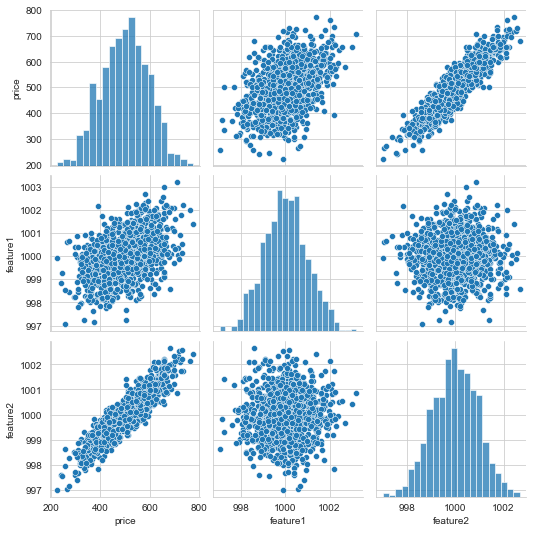

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X = df[['feature1', 'feature2']].values  # converts to array (if you don't sacle dataset create X and y like this)
# y = df['price'].values            

# DL'de datayı modele sokarken datamızı array'e ya da tensörlere çevirmeliyiz.

In [15]:
X = df[['feature1', 'feature2']]
y = df['price']

In [16]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [17]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Arka planda Gradient Descent olduğu için scale'e ihtiyaç duyuyoruz. 
# DL'de genelde MinMaxScaler daha iyi sonuçlar veriyor.

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [25]:
# help(Sequential)

# Sequential ; modelimiz ard arda dizilmiş katmanlardan oluşacaksa Sequential modeller kullanacağız.

In [26]:
#help(Dense)

# Dense ;  fully connected bir yapı istiyorsam ben dense layer kullanacağım.

In [27]:
X_train.shape

(700, 2)

In [28]:
# First way to create model
"""
model = Sequential(
    [
                    Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),            
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)
    ]
)
"""

'\nmodel = Sequential(\n    [\n                    Input(shape = X_train.shape[1]),\n                    Dense(units = 4, activation = "relu"),            \n                    Dense(units = 4, activation = "relu"),\n                    Dense(units = 4, activation = "relu"),\n                    Dense(units = 1)\n    ]\n)\n'

In [29]:
# Second way to create model (recommended)


model = Sequential()    


#model.add(Input(shape = X_train.shape[1])) #alternative way

model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))


# Dense layer diyerek  eklenen layer'ın  fully connected bir layer olacağını  belirtiyoruz.
# son katmanda elimizde bir regresyon problemi olduğundan 1 nöron olmalı ve Aktivasyon fonksiyonunun defaultu ,
# None olduğu için tekrardan yazmadık.
# hidden layer sayısı nöron sayısı tamamen bize kalmış.
# Okunurluğu daha güzel olduğu için bunu kullanacağız.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.weights

# ilk atanan weight'leri bize veriyor ( random olarak atanıyor )

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.6433704 , -0.7616248 ,  0.73506284,  0.88272333],
        [-0.3905797 ,  0.2348504 , -0.45235133, -0.6475835 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.5362737 , -0.15758127, -0.19749582,  0.18735272],
        [-0.56006324,  0.407162  ,  0.11590213,  0.58696467],
        [-0.7145563 ,  0.6287778 ,  0.1880179 ,  0.26395243],
        [ 0.6553268 , -0.73500425, -0.6969785 , -0.02535945]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.2868244 , -0.78454274,  0.31919307, -0.5855993 ],
        [ 0.85392195, -0.00424927, -0.8479213 , -0.34970438],
        [ 0.74076885, -0.13220137,  0.5211895 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

            # For a multi-class classification problem
            model.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # For a binary classification problem
            model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            # For a mean squared error regression problem
            model.compile(optimizer='rmsprop',
                          loss='mse')

In [32]:
model.compile(optimizer = "rmsprop", loss = "mse")

# regresyon  problemi olduğu için loss fonksiyonumuza mse yazdık.optimizasyon algoritması olarak rmsprop seçtik ; 
# diğer optimizasyon algoritmaları da kullanabilirdi.

In [33]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256696.0156
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256628.8906
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 256551.6406
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 256456.8906
Epoch 5/250
22/22 [==============================] - 0s 6ms/step - loss: 256340.6094
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256198.2344
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 256024.3438
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 255814.4062
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255566.0156
Epoch 10/250
22/22 [==============================] - 0s 5ms/step - loss: 255274.4219
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 254935.9531
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 4ms/step - loss: 1684.1521
Epoch 98/250
22/22 [==============================] - 0s 4ms/step - loss: 1645.7681
Epoch 99/250
22/22 [==============================] - 0s 4ms/step - loss: 1607.9093
Epoch 100/250
22/22 [==============================] - 0s 5ms/step - loss: 1569.0898
Epoch 101/250
22/22 [==============================] - 0s 4ms/step - loss: 1525.8579
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 1492.8557
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 1453.0790
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 1421.3726
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1383.6448
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1349.7823
Epoch 107/250
22/22 [==============================] - 0s 4ms/step - loss: 1310.6512
Epoch 108/250
22/22 [==============================] - 0s 4ms/step - loss: 1279.0

22/22 [==============================] - 0s 3ms/step - loss: 24.8960
Epoch 195/250
22/22 [==============================] - 0s 4ms/step - loss: 24.3048
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 23.9042
Epoch 197/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7636
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1262
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1715
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5567
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1482
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4875
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 24.6133
Epoch 204/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4588
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3748
Epoch 206/250
22/2

In [34]:
model.weights
# random olarak atanan weight'lerin değiştiğini görebiliriz.

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.8645066 ,  0.5910256 ,  2.0795224 ,  0.5609674 ],
        [ 2.6122022 ,  3.3646579 ,  2.6716123 , -0.93052727]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.50564736,  0.63413703,  0.6273397 , -0.32828027], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.5362737 ,  1.6860373 ,  1.6630474 ,  2.0028162 ],
        [-0.56006324,  2.5529957 ,  2.263632  ,  2.7352724 ],
        [-0.7145563 ,  2.4266825 ,  1.9972954 ,  2.0347412 ],
        [ 0.6553268 , -0.4520958 , -0.39479417,  0.22511576]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.6069725 , 0.61231923, 0.59075654], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.2868244 , -0.78454274,  0.31919307, -0.5855993 ],
        [ 2.7231157 ,  1.865652  , -0.88

In [35]:
model.history.history

{'loss': [256696.015625,
  256628.890625,
  256551.640625,
  256456.890625,
  256340.609375,
  256198.234375,
  256024.34375,
  255814.40625,
  255566.015625,
  255274.421875,
  254935.953125,
  254547.15625,
  254103.0,
  253593.71875,
  253018.765625,
  252373.765625,
  251650.65625,
  250839.65625,
  249950.28125,
  248963.46875,
  247868.953125,
  246664.484375,
  245357.921875,
  243930.375,
  242375.453125,
  240689.03125,
  238875.421875,
  236913.828125,
  234792.203125,
  232517.34375,
  230083.6875,
  227478.453125,
  224707.953125,
  221757.578125,
  218634.953125,
  215320.75,
  211804.546875,
  208118.8125,
  204221.984375,
  200123.703125,
  195820.84375,
  191311.6875,
  186632.453125,
  181710.140625,
  176591.671875,
  171309.296875,
  165809.421875,
  160106.609375,
  154241.5,
  148181.84375,
  141961.765625,
  135588.921875,
  129073.140625,
  122408.546875,
  115657.5078125,
  108807.5,
  101897.9765625,
  94932.078125,
  87922.5390625,
  80927.2890625,
  73981.929

In [36]:
pd.DataFrame(model.history.history)

,loss
0,256696.016
1,256628.891
2,256551.641
3,256456.891
4,256340.609
...,...
245,24.069
246,24.243
247,24.339
248,25.038


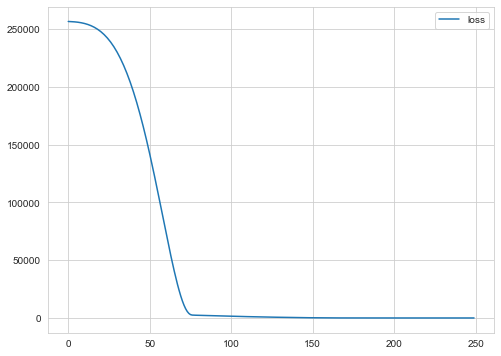

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

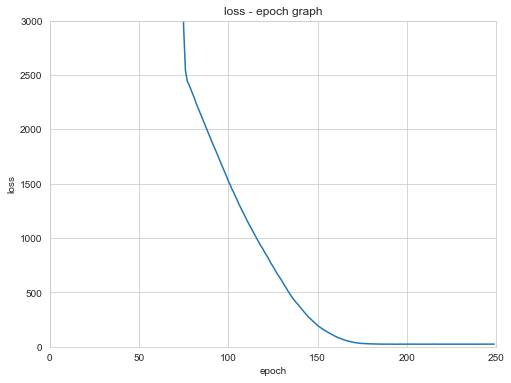

In [38]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]); # focusing on the given y values 

## Model Performance

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
model.evaluate(X_train, y_train, verbose=0)

# compile satırında loss parameteresinin karşısınıa ne yazarsak onun skoru/skorları döner.
# model.evaluate arka planda burada predict yapıyor.

23.73021697998047

In [41]:
model.evaluate(X_test, y_test, verbose=0)

25.099393844604492

In [42]:
# şu şekilde de yapabiliriz : 

In [43]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [44]:
y_pred.shape

(300, 1)

In [45]:
y_test.shape

(300,)

In [46]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}   # y_pred'in sonucu 2 boyutlu bir aray
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
695,524.967,522.721
86,411.638,417.882
644,564.112,562.898
299,503.514,502.259
77,507.434,506.114
845,579.431,578.301
946,594.840,598.689
587,512.584,517.653
501,315.519,321.548
382,612.754,617.429


In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = mean_squared_error(actual, pred,squared=False)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [48]:
eval_metric(y_test, y_pred)

r2_score: 0.9971452106431782 
mae: 4.017088627944382 
mse: 25.09939842326047 
rmse: 5.009929981872049


## Final Model and Model Deployment

### Final Model Training

In [49]:
scaler = MinMaxScaler().fit(X)

In [50]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [51]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.44380388, 0.4885581 ],
       [0.29323398, 0.71363026],
       [0.48977598, 0.32595231],
       ...,
       [0.7144056 , 0.32658556],
       [0.60372768, 0.27637009],
       [0.35350286, 0.78575664]])

In [52]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

In [53]:
#final_model.summary()

In [54]:
#final_model.weights

In [55]:
final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

#input_dim = 2 or input_dim = X_train.shape[1] yazmamamıza rağmen model.fit kısmında 2 feature olduğunu algoritma anlıyor.
# yazmazsak ama fit etmeden model.summary()'i çalıştırdığımızda hata alırız .

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257365.3750
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257255.3281
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 257124.3906
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 256964.9375
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 256772.2188
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 256541.3906
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 256266.6562
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 255941.2656
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 255563.9844
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 255120.7500
Epoch 11/250
32/32 [==============================] - 0s 4ms/step - loss: 254613.0312
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 3ms/step - loss: 904.9053
Epoch 98/250
32/32 [==============================] - 0s 3ms/step - loss: 874.9174
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 846.2573
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 815.4785
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 786.2554
Epoch 102/250
32/32 [==============================] - 0s 3ms/step - loss: 758.6158
Epoch 103/250
32/32 [==============================] - 0s 3ms/step - loss: 732.1699
Epoch 104/250
32/32 [==============================] - 0s 3ms/step - loss: 707.0669
Epoch 105/250
32/32 [==============================] - 0s 3ms/step - loss: 679.6428
Epoch 106/250
32/32 [==============================] - 0s 3ms/step - loss: 654.8338
Epoch 107/250
32/32 [==============================] - 0s 3ms/step - loss: 632.8140
Epoch 108/250
32/32 [==============================] - 0s 3ms/step - loss: 608.1257
Epoch 10

32/32 [==============================] - 0s 3ms/step - loss: 24.4479
Epoch 196/250
32/32 [==============================] - 0s 3ms/step - loss: 24.5443
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4293
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4174
Epoch 199/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6278
Epoch 200/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6637
Epoch 201/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6922
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5440
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4290
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5480
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6207
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5307
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)


There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [56]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
#final_model.save("model_fake_reg") 

### Loading Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [61]:
sample = [[998, 1000]]

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[0.15312457, 0.52980619]])

In [63]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 80ms/step


array([[418.99747]], dtype=float32)

## Prediction-2

In [64]:
my_dict = {"feature1": [997, 998, 999, 1000, 1001],
           "feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

,feature1,feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 33ms/step


array([[378.87674],
       [330.59195],
       [282.25607],
       [233.9202 ],
       [185.58434]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___